<a href="https://colab.research.google.com/github/prithvikr66/three_js/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##REINFORCEMENT LEARNING MODEL
#Time Series Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv("TrainAndValid.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# New Section

In [ ]:
len(df)

393935

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393935 entries, 0 to 393934
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   393935 non-null  int64  
 1   SalePrice                 393935 non-null  int64  
 2   MachineID                 393935 non-null  int64  
 3   ModelID                   393935 non-null  int64  
 4   datasource                393935 non-null  int64  
 5   auctioneerID              373799 non-null  float64
 6   YearMade                  393935 non-null  int64  
 7   MachineHoursCurrentMeter  142699 non-null  float64
 8   UsageBand                 69573 non-null   object 
 9   saledate                  393935 non-null  object 
 10  fiModelDesc               393935 non-null  object 
 11  fiBaseModel               393935 non-null  object 
 12  fiSecondaryDesc           259207 non-null  object 
 13  fiModelSeries             55691 non-null   o

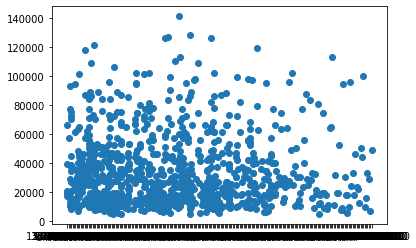

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])


In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    251236
UsageBand                   324362
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             134728
fiModelSeries               338244
fiModelDescriptor           324108
ProductSize                 207114
fiProductClassDesc               0
state                            1
ProductGroup                     1
ProductGroupDesc                 1
Drive_System                291050
Enclosure                      324
Forks                       205208
Pad_Type                    315875
Ride_Control                247486
Stick                       315875
Transmission                213393
Turbocharged                315875
Blade_Extension     

<AxesSubplot:ylabel='Frequency'>

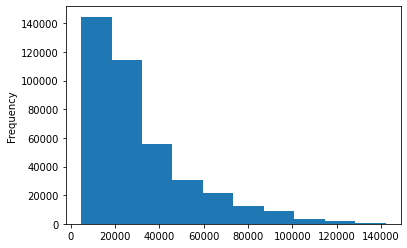

In [ ]:
df["SalePrice"].plot.hist()

In [ ]:
##passing dates
# enriching time and date
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
393930     10/7/2011 0:00
393931    10/26/2011 0:00
393932     9/22/2011 0:00
393933     9/28/2011 0:00
393934     12/6/2011 0:00
Name: saledate, Length: 393935, dtype: object

In [ ]:
df=pd.read_csv("TrainAndValid.csv",
               parse_dates=["saledate"])
df.saledate,df.saledate.dtype

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(0        2006-11-16
 1        2004-03-26
 2        2004-02-26
 3        2011-05-19
 4        2009-07-23
             ...    
 393930   2011-10-07
 393931   2011-10-26
 393932   2011-09-22
 393933   2011-09-28
 393934   2011-12-06
 Name: saledate, Length: 393935, dtype: datetime64[ns], dtype('<M8[ns]'))

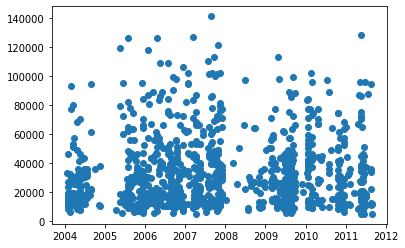

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [ ]:
df.head().T


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
##Sort DataFrame by saledate
df.sort_values(by=["saledate"],
               inplace=True,
               ascending=True)
df["saledate"].head()

205615   1989-01-17
231507   1989-01-31
92531    1989-01-31
127674   1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_temp=df.copy()

In [ ]:
df_temp.saledate

205615   1989-01-17
231507   1989-01-31
92531    1989-01-31
127674   1989-01-31
55454    1989-01-31
            ...    
392664   2011-12-30
393098   2011-12-30
393211   2011-12-30
393175   2011-12-30
393238   2011-12-30
Name: saledate, Length: 393935, dtype: datetime64[ns]

In [ ]:
df_temp["saleYear"]=df_temp["saledate"].dt.year
df_temp["saleMonth"]=df_temp["saledate"].dt.month
df_temp["saleDay"]=df_temp["saledate"].dt.day
df_temp["saleDayofWeek"]=df_temp["saledate"].dt.dayofweek
df_temp["saleDayofYear"]=df_temp["saledate"].dt.dayofyear

In [ ]:
df_temp.head(20).T


,205615,231507,92531,127674,55454,233186,55455,87602,67034,78278,127735,113454,53101,238656,98567,134080,144032,135284,54438,134119
SalesID,1646770,1725330,1403696,1475720,1305336,1728883,1305337,1391932,1340383,1370389,1475794,1449641,1298915,1740836,1415950,1491298,1511962,1493165,1301582,1491351
SalePrice,9500,25000,23500,23500,17000,30000,17000,41000,110000,28000,23500,11750,49000,10000,40000,46000,17000,57000,24000,50000
MachineID,1126363,1538651,888616,1193835,1236263,1523610,1517075,154142,1311130,1194311,1431122,492948,1338785,1531656,1142272,1322436,1136546,1440461,1199381,846943
ModelID,8434,8948,7110,7277,3356,9105,3356,7008,3406,4146,7277,3356,4124,11933,3357,4107,7464,2759,4123,4107
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,18.0,99.0
YearMade,1974,1968,1986,1973,1972,1986,1972,1981,1987,1974,1974,1966,1984,1975,1978,1987,1973,1986,1974,1987
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
df_temp["state"].value_counts

<bound method IndexOpsMixin.value_counts of 205615       Texas
231507     Florida
92531      Florida
127674     Florida
55454      Florida
            ...   
392664    New York
393098    New York
393211    New York
393175    New York
393238    New York
Name: state, Length: 393935, dtype: object>

In [ ]:
for label,content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
##Converting our string to category
##under the hood each category receives a number
for label,content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_temp[label]=content.astype("category").cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393935 entries, 205615 to 393238
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   393935 non-null  int64         
 1   SalePrice                 393935 non-null  int64         
 2   MachineID                 393935 non-null  int64         
 3   ModelID                   393935 non-null  int64         
 4   datasource                393935 non-null  int64         
 5   auctioneerID              373799 non-null  float64       
 6   YearMade                  393935 non-null  int64         
 7   MachineHoursCurrentMeter  142699 non-null  float64       
 8   UsageBand                 69573 non-null   category      
 9   saledate                  393935 non-null  datetime64[ns]
 10  fiModelDesc               393935 non-null  category      
 11  fiBaseModel               393935 non-null  category      
 1

In [ ]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_temp["state"].cat.codes

205615    43
231507     8
92531      8
127674     8
55454      8
          ..
392664    31
393098    31
393211    31
393175    31
393238    31
Length: 393935, dtype: int8

In [ ]:
df_temp.isna().sum()/len(df_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.111503
YearMade                     0.000000
MachineHoursCurrentMeter    63.776004
UsageBand                   82.338965
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.200566
fiModelSeries               85.862896
fiModelDescriptor           82.274487
ProductSize                 52.575679
fiProductClassDesc           0.000000
state                        0.000254
ProductGroup                 0.000254
ProductGroupDesc             0.000254
Drive_System                73.882747
Enclosure                    0.082247
Forks                       52.091843
Pad_Type                    80.184548
Ride_Control                62.824070
Stick                       80.184548
Transmission

In [ ]:
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if df_temp[label].isna().sum():
      df_temp[label+"_is_missing"]=pd.isnull(content)
      df_temp[label]=content.fillna(content.median())




In [ ]:
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
     print(label)

In [ ]:
df_temp["auctioneerID_is_missing"].value_counts()

False    373799
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [ ]:

##filling categorical variables into numbers
for label,content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
   print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
##Turn categorical variables into numbrs
for label,content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_temp[label+"_is_missing"]=pd.isnull(content)
    df_temp[label]=pd.Categorical(content).codes+1


In [ ]:
df_temp.head().T

,205615,231507,92531,127674,55454
SalesID,1646770,1725330,1403696,1475720,1305336
SalePrice,9500,25000,23500,23500,17000
MachineID,1126363,1538651,888616,1193835,1236263
ModelID,8434,8948,7110,7277,3356
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True


In [ ]:
##BUILDING ML MODEL
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=50)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])


CPU times: user 14min 21s, sys: 4.2 s, total: 14min 26s
Wall time: 14min 26s


RandomForestRegressor(random_state=50)

In [ ]:
##splitting data
from sklearn.model_selection import train_test_split

df_val=df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]
len(df_train),len(df_val)


(393935, 0)

In [ ]:
X_train,y_train=df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"]
X_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

In [ ]:
##BUILDING AN EVALUATION METRIC
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
 def rmsle(y_test,y_preds):
   return np.sqrt(mean_squared_log_error(y_test,y_preds))

